In [1]:
#this script plots temperature data

#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.
#ExampleDataA can be found at
#www.renewables.ninja and Gelaro et al. (2017), doi: 10.1175/JCLI-D-16-0758.1 - Oxford Air Temperature


import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [2]:
#import the RadCam Lower Reading Room 5 minute temp and humidity data

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\TemperaturePlotting\\ExampleDataA.csv",)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
del df['Humidity']

df = df.sort_values(by="DateTime")
df.set_index('DateTime')



#http://blog.josephmisiti.com/group-by-datetimes-in-pandas
#df['Date'] = df["DateTime"].apply( lambda df : 
#datetime.datetime(year=df.year, month=df.month, day=df.day))	
#df.set_index(df["Date"],inplace=True)

#df = df.resample('d').mean()


,Temperature
DateTime,
2019-11-01 00:02:00,18.5
2019-11-01 00:07:00,18.5
2019-11-01 00:12:00,18.5
2019-11-01 00:17:00,18.4
2019-11-01 00:22:00,18.4
...,...
2020-11-13 14:21:00,21.1
2020-11-13 14:27:00,21.0
2020-11-13 14:31:00,21.0


In [3]:
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day_name()
df['Date']=df['DateTime'].dt.date
df.head()

,DateTime,Temperature,Month,Day,Date
0,2019-11-01 00:02:00,18.5,November,Friday,2019-11-01
1,2019-11-01 00:07:00,18.5,November,Friday,2019-11-01
2,2019-11-01 00:12:00,18.5,November,Friday,2019-11-01
3,2019-11-01 00:17:00,18.4,November,Friday,2019-11-01
4,2019-11-01 00:22:00,18.4,November,Friday,2019-11-01


In [4]:
df1 = df.groupby(['Month', 'Day'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Day')
heatmap_data.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,20.032258,20.068531,19.717269,19.720245,20.294023,20.423940,20.340187
August,23.979705,23.327782,23.583019,23.254597,23.941557,24.313059,24.330351
December,18.313151,17.844307,17.462579,16.874643,18.031932,18.428244,18.235539
February,18.753182,18.241322,18.183304,17.622330,18.903665,18.568379,18.731152
January,18.831918,17.739448,17.687968,17.049123,18.679215,18.142744,18.750717


In [7]:
cols = list(heatmap_data)
cols.insert(0, cols.pop(cols.index('Monday')))
cols.insert(1, cols.pop(cols.index('Tuesday')))
cols.insert(2, cols.pop(cols.index('Wednesday')))
cols.insert(3, cols.pop(cols.index('Thursday')))
cols.insert(4, cols.pop(cols.index('Friday')))
cols.insert(5, cols.pop(cols.index('Saturday')))
heatmap_data = heatmap_data.loc[:, cols]

#months for heatmap
Months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[Months]

Text(0.5, 1.0, 'RadCam LRR Temperature (°C)')

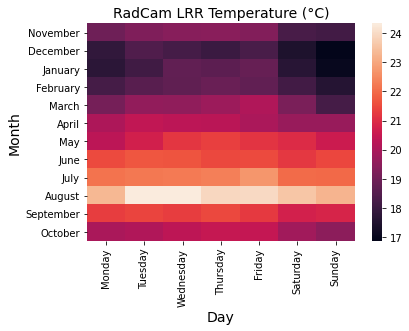

In [6]:
#plot the heatmap
sns.heatmap(heatmap_data)
plt.xlabel("Day", size=14)
plt.ylabel("Month", size=14)
plt.title("RadCam LRR Temperature (°C)", size=14)